# Business Case
### Generating Data Exploration insights for sales effectiveness and creating an ML model to predict lead quality for FicZon Inc, an IT solutions provider. The main task is to help the company increase sales effectiveness by automating the categorisation of lead quality by using machine learning technology. This is a binary classification task that involves prediction of whether lead quality is high or low potential. 

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Querying Data from the SQL Database

In [57]:
# PyMySQL is an interface for connecting to a MySQL database server from Python
!pip install pymysql

# MySQL driver written in Python 
!pip install mysql-connector

In [58]:
import mysql.connector

In [59]:
# making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user=' dm_team2',
                                  password='DM!$Team&27@9!20!')

In [60]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [61]:
# connecting to the database
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user=' dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [62]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)
# The project sales database contains only one table

  Tables_in_project_sales
0                    data


In [63]:
#Displaying the details of the data table
query = "select * from data" # SQL statement for selecting all rows and columns from the table
data = pd.read_sql(query,connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [64]:
# Converting datafrom table to csv file
data.to_csv("project_sales_data.csv")

# Importing the data

In [2]:
data = pd.read_csv("project_sales_data.csv")
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [5]:
data.describe(include="O")

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


- The dataset contains 7422 entries with 10 columns- 1 numeric and 9 categorical.
- The "Created" column is a date time stamp which could be converted into a more usable form like day, month, hour columns etc.
- The 'Mobile' column has many unique values and isn't much useful since most numbers are hidden for privacy purposes. This columns has some missing values. 
- The 'EMAIL' column is also a unique value column where all details except the first and last 10 charachters of the email id are hidden. We could however extract the internet domain extensions of the email id and maybe get some insights through it.This columns has some missing values hidden under the label '#VALUE!' which shows that the email id for that entry is missing. 
- The status column contains 11 different labels which has to categorized into high or low potential labels which would serve as our target variable. 

# Domain Analysis

### Created
This feature gives us details about the date and time the order was generated. This feature could give interesting insights on certain days, months or time of the days when orders are more or less etc.

### Product_ID
This features gives us the ID of the IT product ordered by the customer.  

### Source
This feature tells us the the mode in which the customer placed the order such as website, call, live-chat direct.

### Mobile
The contact number of the customer. 

### Email 
The email id if the business/customer.

### Sales_Agent
The sales agent who was responsible for that sales if the product to the customer. Therer are 12 different sales agents. 

### Location
The location of the customer- domestic or international. There are 17 different locations. 

### Delivery_Mode
The mode of delivery of the product. There are 5 types of modes.

### Status
The current status of the customer's order. 

# Data Preparation

- This preprocessing step involves the manipulation and consolidation of raw data  into a standardized format so that it can be used in a model. This would include feature creation, cleaning data, data augmentation, transformations etc.
- In this case, we need to convert the date and time related columns into a format which can be used for analysis and be understood by the model. 
- We also need to create the new target variable. 

## Creation of DateTime columns

In [9]:
data["Created"] = pd.to_datetime(data["Created"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7364 non-null   float64       
 2   Source         7405 non-null   object        
 3   Mobile         5612 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7399 non-null   object        
 6   Location       7364 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 522.0+ KB


In [10]:
data["Weekday"] = data["Created"].dt.weekday
data["Month"] = data["Created"].dt.month
data["Day"]= data["Created"].dt.day
data["Hour"] = data["Created"].dt.hour
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Weekday,Month,Day,Hour
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2,11,14,10
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2,11,14,9
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2,11,14,9
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2,11,14,8
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2,11,14,7


## Dropping Unique Value Features


Dropping unique value columns i.e., email and mobile since these columns don't provide useful information that would help in prediction of the target variable. 

In [11]:
data.drop("Created", axis=1, inplace=True)
data.drop("Mobile", axis=1, inplace=True)
data.drop("EMAIL", axis=1, inplace=True)


## Creation of Target Variable

In [12]:
data['Status'] = data['Status'].str.lower()
data.Status.unique()

array(['open', 'potential', 'in progress positive', 'not responding',
       'just enquiry', 'junk lead', 'converted', 'in progress negative',
       'lost', 'long term'], dtype=object)

Categorizing the status labels as low or high potential and assigning it to the respective values. 

In [13]:
data.Status= data.Status.map({'converted':'High Potential',
                            'in progress positive':'High Potential',
                            'potential':'High Potential',
                            'open':'High Potential',
                            'just enquiry':'High Potential',
                            'long term':'Low Potential',
                            'not responding':'Low Potential',
                            'in progress negative':'Low Potential',
                            'junk lead':'Low Potential', 
                            'lost':'Low Potential'})
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Weekday,Month,Day,Hour
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,High Potential,2,11,14,10
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,9
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,9
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,8
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,7


# EDA

After data preparation and cleaning we have 10 features that are all categorical in nature. 

## Univariate Analysis

In [34]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Product_ID

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

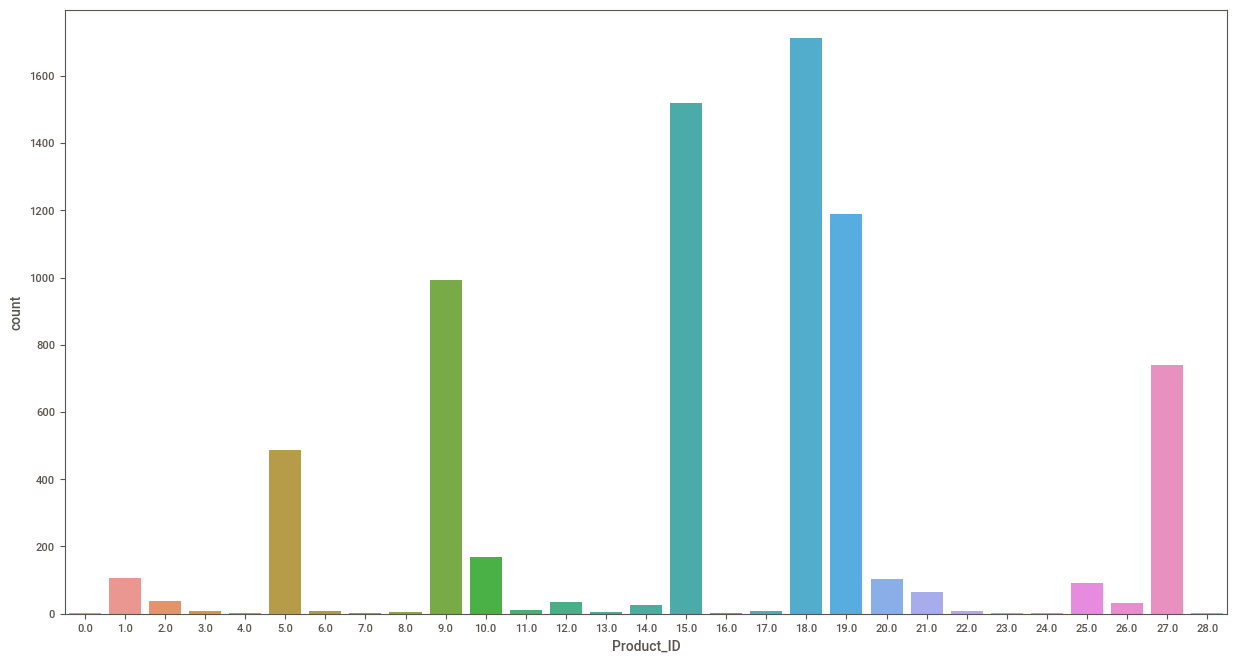

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(data= data, x="Product_ID")

- Product ID is a categorical variable in a numeric form. The magnitude of the product id values have no impact on the target variable and hence need to be categorically encoded. 
- The most frequently ordered products are as follows in descending order- 
     - 18 (23.2%)
     - 15 (20.6%)
     - 19 (16.1%)
     - 9  (13.5%)
     - 27 (10.0%)
     - 5  (6.6%)
     - 10 (2.3%)
- These 7 products make up 92% of the total products ordered while the remaining 22 products make up only 8%. 
- Product ID 18 is the most frequently ordered product while product IDs 4 & 7 are the least ordered products. 

### Source

<AxesSubplot:xlabel='count', ylabel='Source'>

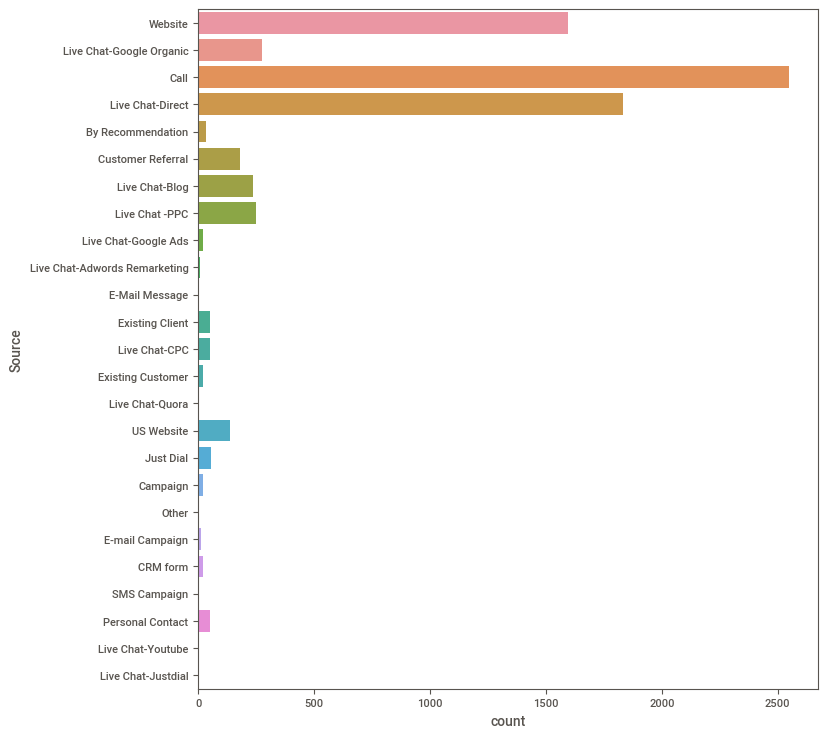

In [36]:
plt.figure(figsize=(8,9))
sns.countplot(data= data, y="Source")

- There are 25 different sources from which the orders were recieved. 
- Calls is the most frequently used source with 34% observations followed by Live Chat-Direct with 25% and Website 22% of observations. 
- The reamining sources together make up less than 20 % of observations. 
- E-Mail Message and Live Chat-Justdial are the sources from where the least orders were recieved.
- Overall, most of the sources were from online platforms like websites and live-chats with comaparitively fewer direct voice calls. This shows that customers tend to prefer using such online platforms as compared to making calls. Improving the quality of these online platforms could lead to higher customer churn and order conversion rates. 

### Sales_Agent

<AxesSubplot:xlabel='count', ylabel='Sales_Agent'>

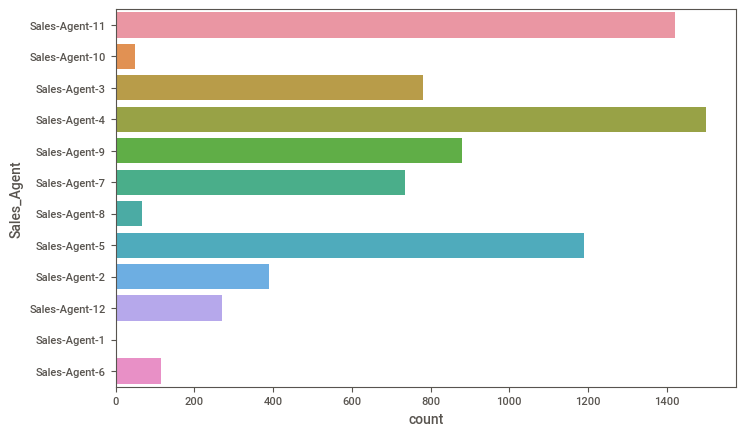

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data= data, y="Sales_Agent")

- The sales agents responsible for a particular order could be one of the key indicators of lead quality as well as a mark of their work performance. This seems to be an important feature for our model.
- There are 12 different sales agents
- The top 6 sales agents with the most orders are as follows in descending order
    - Sales-Agent-4:  20%
    - Sales-Agent-11: 19%
    - Sales-Agent-5:  16%
    - Sales-Agent-9:  12%
    - Sales-Agent-3:  11%
    - Sales-Agent-7:  10%
- The reamaining make up less than 12 % of the observations
- Sales-Agent-1 has the least number of observations


### Location

<AxesSubplot:xlabel='count', ylabel='Location'>

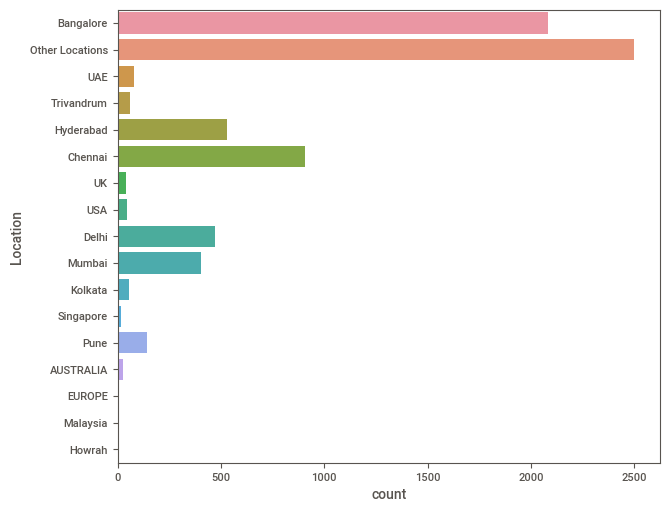

In [38]:
plt.figure(figsize=(7,6))
sns.countplot(data= data, y="Location")

- There are 17 different customer locations - 7 international, 9 domestic and one 'other' category that clubs all the remainng locations. 
- The top 6 most frequently occuring locations in descending order are as follows-
  - Other Locations (34%)
  - Bangalore (28%)
  - Chennai (12%)
  - Hyderabad (7%)
  - Delhi (6%)
  - Mumbai (5%)
- Howrah is the location with the least number of sales leads of the product. 
- The sales in the domestic market is greater with almost 60% of the total as comapred to sales in the international markets with less than 6% of the total.
- Bangalore is the domestic location with most sales while UAE is the international location with the most orders. 

### Delivery Mode

<AxesSubplot:title={'center':'Delivery_Mode'}>

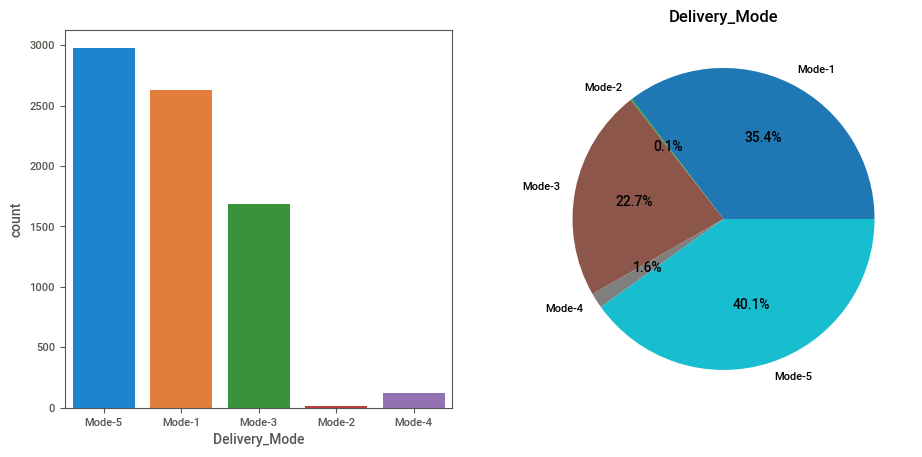

In [39]:
plt.figure(figsize=(11,5))
ax= plt.subplot(1,2,1)
sns.countplot(data= data, x="Delivery_Mode")
ax= plt.subplot(1,2,2)
data.groupby("Delivery_Mode").size().plot(kind="pie", title="Delivery_Mode", ylabel="", autopct='%1.1f%%', colormap="tab10")

- There are 5 types of delivery modes
- Delivery mode-5 is the most frequently occuring type with 40% observations while delivery mode-2 is the least with 0.1% observations.


### Weekday

<AxesSubplot:xlabel='Weekday', ylabel='count'>

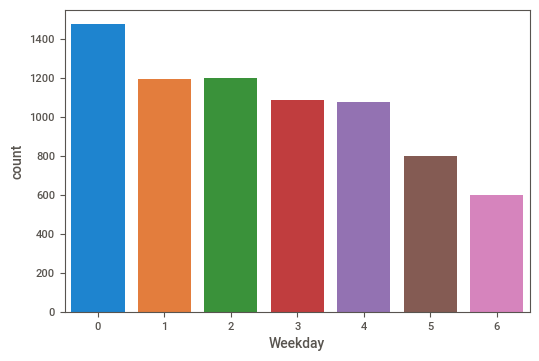

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data= data, x="Weekday")

- The percentage orders recieved on the weekdays are as follows- 
  - 0-Monday: 20%
  - 1-Tuesday: 16%
  - 2-Wednesday: 16%
  - 3-Thursday: 15%
  - 4-Friday: 14%
  - 5-Saturday: 11%
  - 6-Sunday: 8%
- Most orders are recieved on Monday while least on Sunday.
- Percentage of orders placed decreases as the week progresses. 


### Month

<AxesSubplot:xlabel='Month', ylabel='count'>

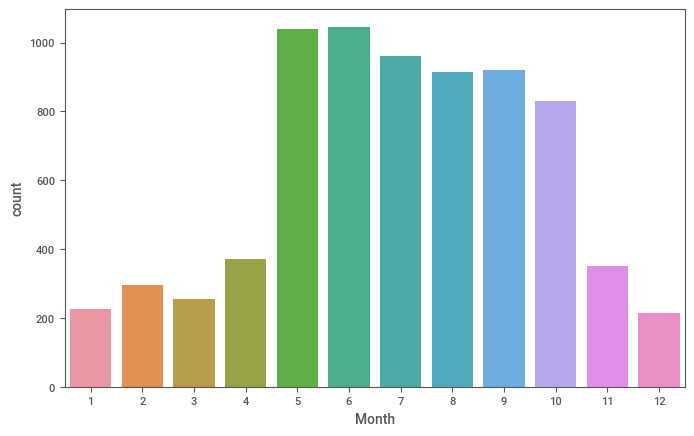

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data= data, x="Month")

- The percentage orders recieved on a monthly basis arranged in descending order are as follows- 
   - 6-June: 14.1%
   - 5-May: 14.0%
   - 7-July: 12.9%
   - 9-September: 12.4%
   - 8-August: 12.3%
   - 10-October: 11.2%
   - 4-April: 5.0%
   - 11-November: 4.7%
   - 2-February: 4.0%
   - 3-March: 3.4%
   - 1-January: 3.0%
   - 12-December: 2.9%
- The maximum orders are in the month of June while the least is in the month of December. 
- Most sales happen mid year with the second and third quarter of the year making the maximum sales. The companies sales dip towards  the end and the beignning of the year i.e., the months of December and January. 
- The companies sales are best between May-September and peak during the months of May and June. 

### Day

<AxesSubplot:xlabel='Day', ylabel='count'>

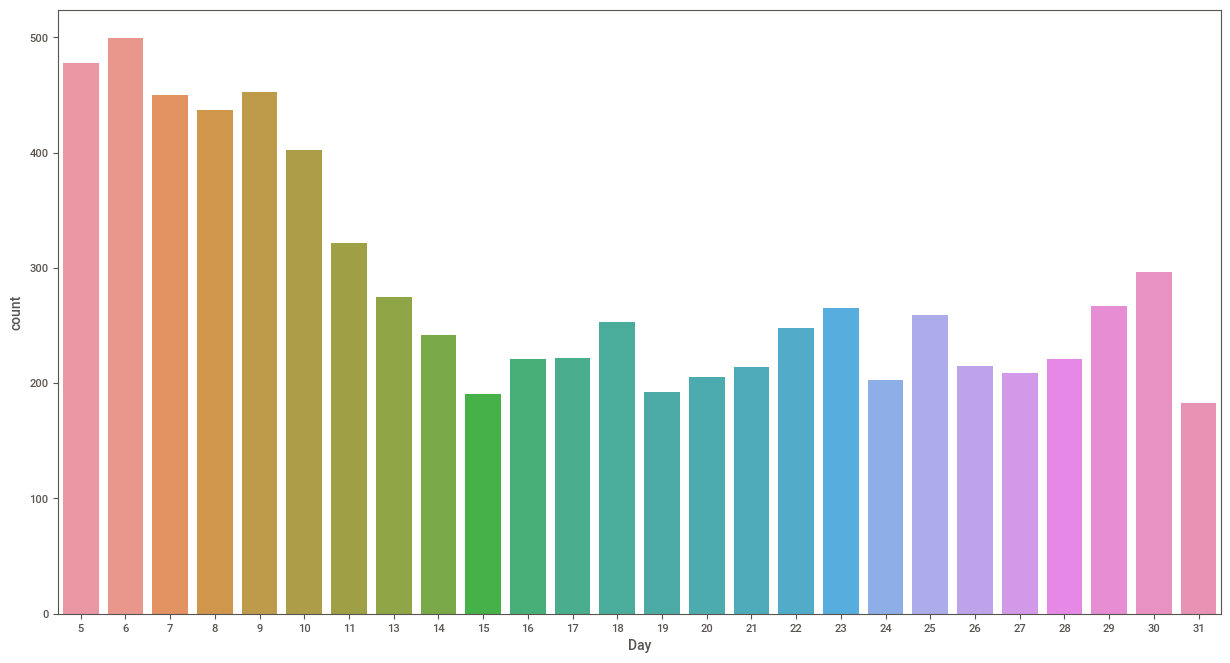

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(data= data, x="Day")

- Most orders are recieved on the 6th day of the month while the least on the 31st.
- In general, the number of orders recived are high in the beginning of the month from the 5h to 10th and gradually decline as the month progresses achieving somewhat of a constant graph with few small peaks. 
- In conclusion, more orders are placed during the beginning of the month as compared to the end or middle. 

### Hour

<AxesSubplot:xlabel='Hour', ylabel='count'>

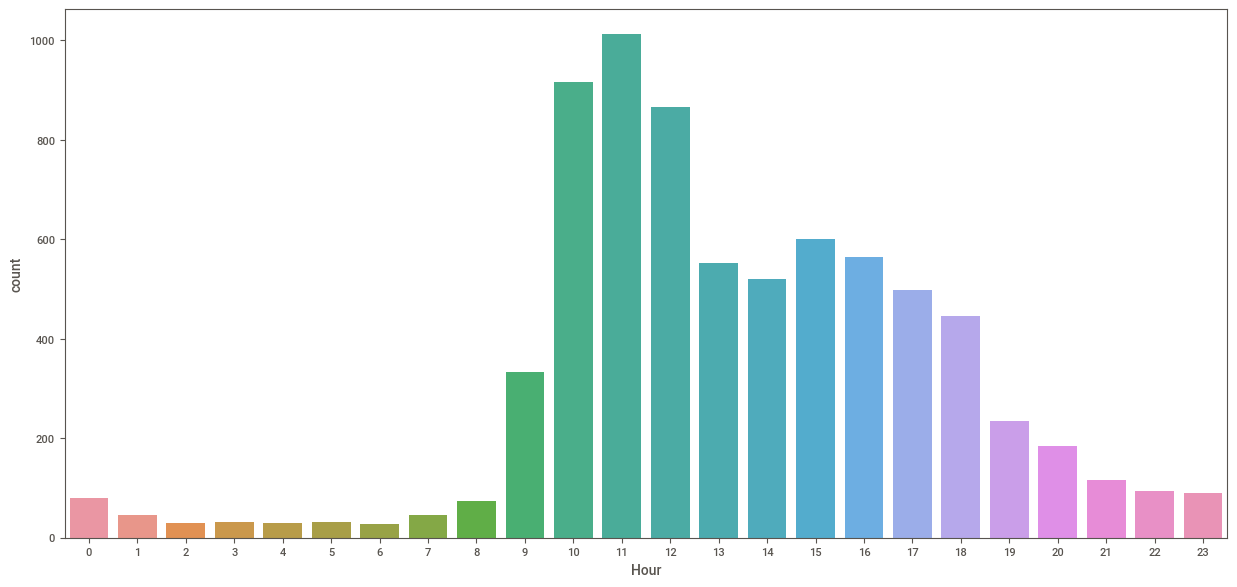

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(data= data, x="Hour")

- Late morning i.e. from 10:00a.m -12:00p.m seems to be the most popular time of the day to place orders while the early morning hours i.e, from 1:00a.m -6:00a.m is the least popular time. The evening and afternoon hours recieve lesser orders as compared to late mornings. This pattern seems to be in accordance with the genearl working hours of a company. 
- Most orders are placed at 11:00 a.m while the least at 2:00 a.m.
- In conclusion, the orders placed are less till 8:00 am, then gradually increase and peak at 11:00 am and finally decrease as the hours progress. 

### Status

<AxesSubplot:xlabel='count', ylabel='Status'>

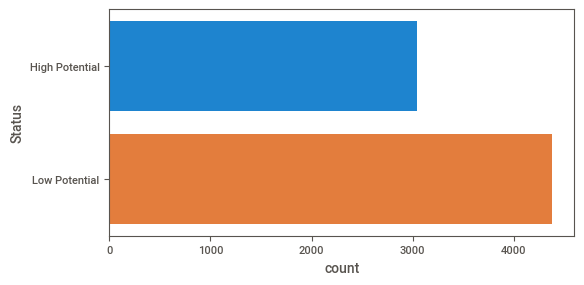

In [44]:
plt.figure(figsize=(6,3))
sns.countplot(data= data, y="Status")

After categorizing the 12 different labels of the status column into high or low potential, we can see that more orders are low potential (60%) as comapred to high potential (40%). This is our target variable. 

## Bivariate Analysis

### Product_ID vs Status

<AxesSubplot:xlabel='count', ylabel='Product_ID'>

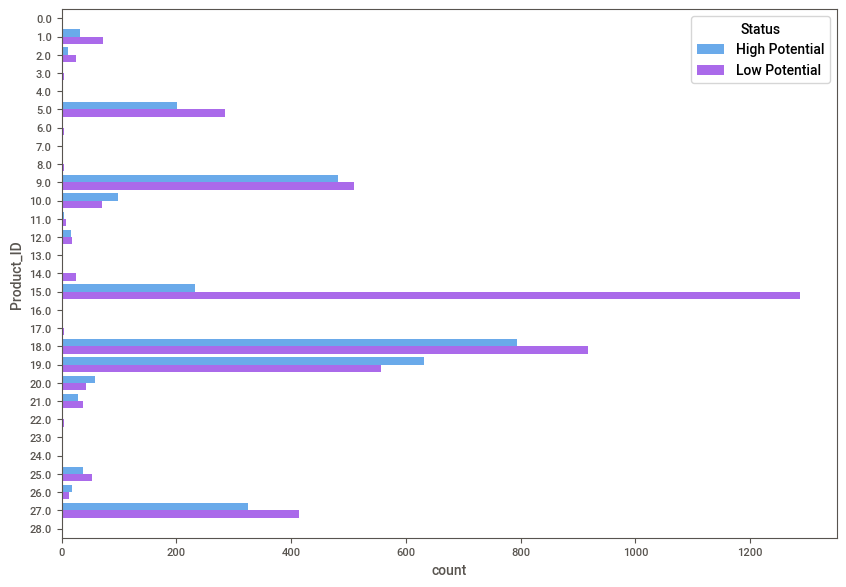

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, y="Product_ID", hue="Status", palette="cool")

- In general, most products have low lead potential.
- Product id 15 has almost 5 times more observations that are low lead potential as compared to high potential.
- Product id 19 and 20 have more entries with higher lead potential i.e, customers seem to purchase these products more. 

### Sales_Agent vs Status

<AxesSubplot:xlabel='count', ylabel='Sales_Agent'>

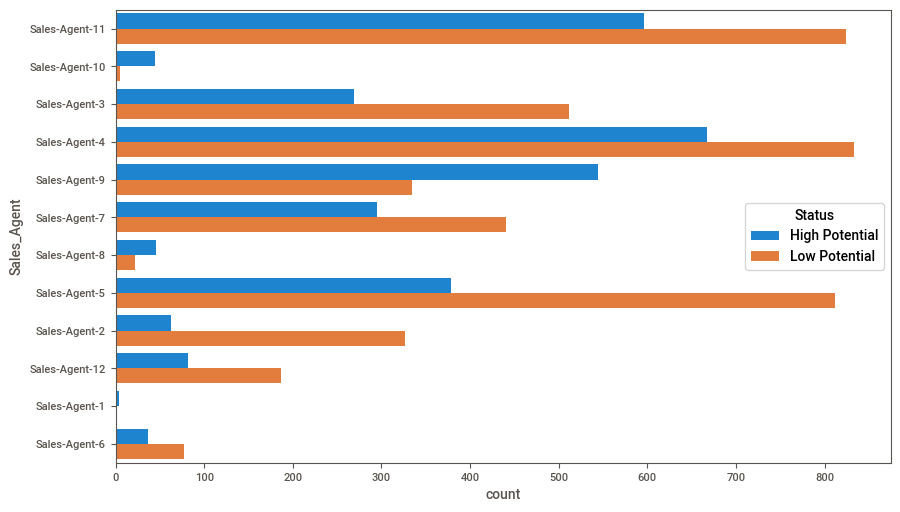

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y="Sales_Agent", hue="Status")

- In general most sales agents have customers with low lead potential.
- Customers with sales-agent-4 have the most observations with low lead potential while sales-agent-2 has proprtionally the most customers with low lead potential. This could be indicative of poor work performance of these sales agents.
- Sales-agent-9 and 8 has more customers with high lead potential.  
- Sales-agent 10 has proportionally the most customers with high lead potential. This could be indicative of excellent work performance. 

### Source vs Status

<AxesSubplot:xlabel='count', ylabel='Source'>

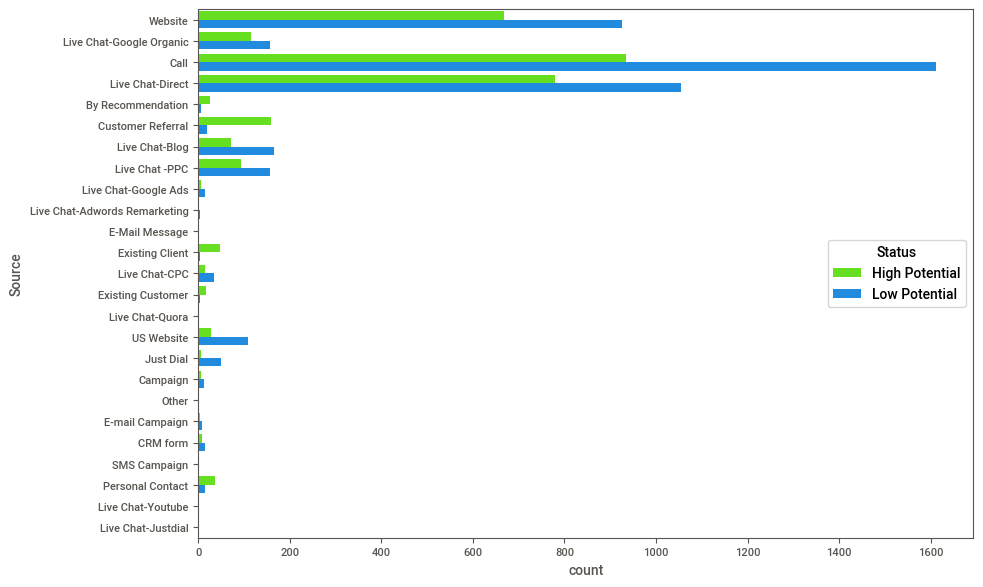

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, y="Source", hue="Status", palette="gist_rainbow")

- Clients recieved through Customer referrals and recommendations generates the highest lead potential. Existing clents/customers and personal contacts are sources that generate more high lead qualities as well. 
- Customers from US Website source have the most low potential leads.
- Sources from live chats and direct calls have more cutomers with low lead potential as compared to high. 

### Delivery_Mode vs Status

<AxesSubplot:xlabel='Delivery_Mode', ylabel='count'>

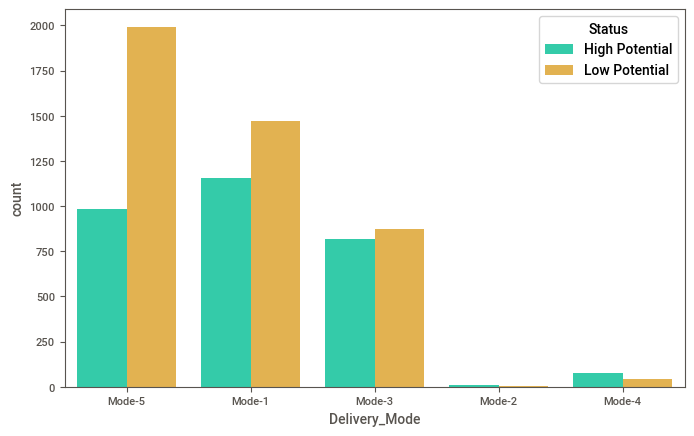

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="Delivery_Mode", hue="Status" ,palette="turbo")

- Delivery mode-2 and 4 have twice as more high potential clients as comapred to low.
- Delivery mode-3 and 1 have almost the same number of high and low potential clients.
- Delivery mode-5 has twice as many low potential customers as compared to high potential. 

### Location vs Status

<AxesSubplot:xlabel='count', ylabel='Location'>

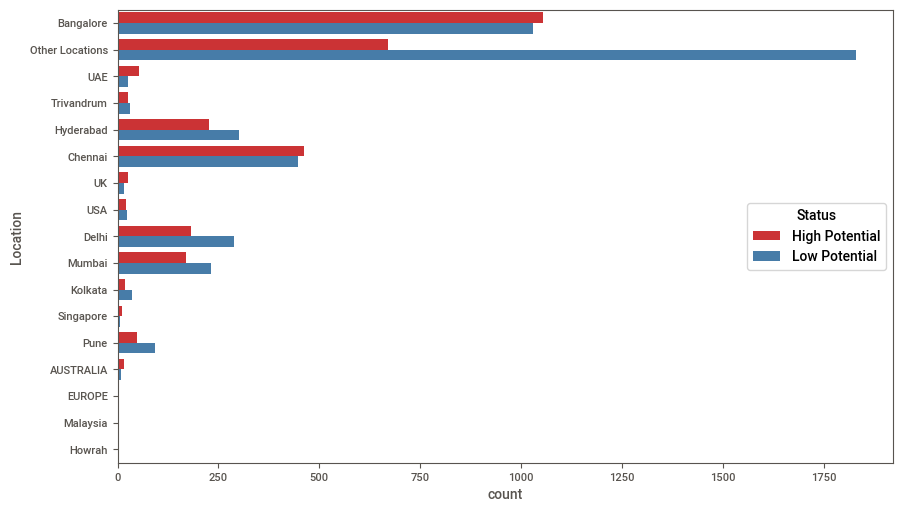

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y="Location", hue="Status", palette="Set1")

- Chennai, Trivandrim, Bangalore and  have almost the same number of high and low potential customers.
- Major Indian cities like Delhi, Mumbai, Kolkata and Pune have more low potential customers than high. 
- Other locations has the most low potential customers. 
- UK, Australia and UAE have almost half as more high potential customers as compared to low. 
- International locations seem to have more high potential customers as comapred to domestic locations although more number of orders come from the domestic market.

### Weekday vs Status

<AxesSubplot:xlabel='Weekday', ylabel='count'>

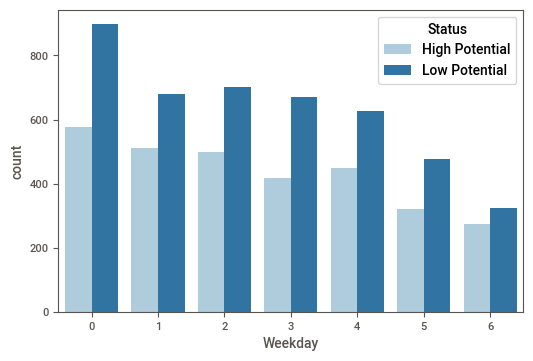

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Weekday", hue="Status", palette="Paired", )

- The lead quality i.e, high or low potential customers doesn't seem to be dependent on the weekday since all days have more low than high potential customers. This is in accordance to the fact that in general, the comapny recieves more low potential customers (60%) as seen in the univariate analysis.

### Month vs Status

<AxesSubplot:xlabel='Month', ylabel='count'>

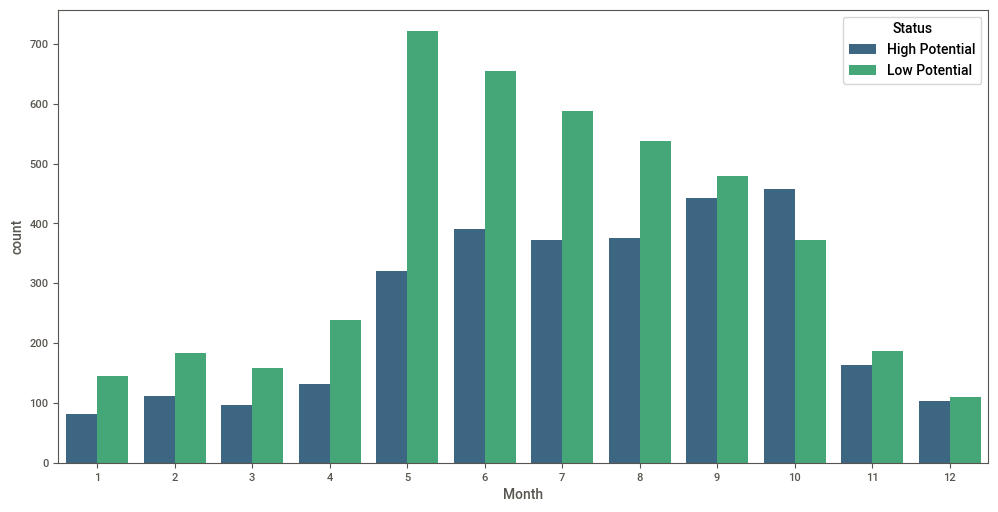

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="Month", hue="Status", palette="viridis")

- The month of October has the most high potential customers.
- The month of May has the most low potential customers.
- The months of September, November and December have almost the same number of high and low potential customers.
- In general, the number of low potential leads are higher for most months. 

### Day vs Status

<AxesSubplot:xlabel='Day', ylabel='count'>

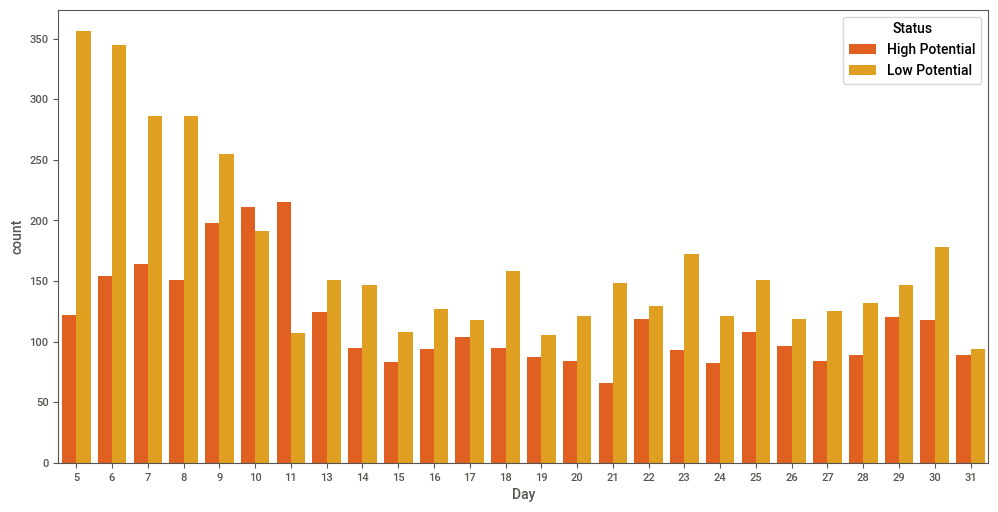

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="Day", hue="Status", palette="autumn")

- The 10th and 11th days of the month have the most high potential clients.
- The first week i.e 5th-8th days of the month have the most low potential customers. Despite there being more orders placed during this time, most of them are low potential. 
- Mid month days (15th-22nd) and the 31st i.e last days of the month have almost the same number of high and low potential clients.



### Hour vs Status

<AxesSubplot:xlabel='Hour', ylabel='count'>

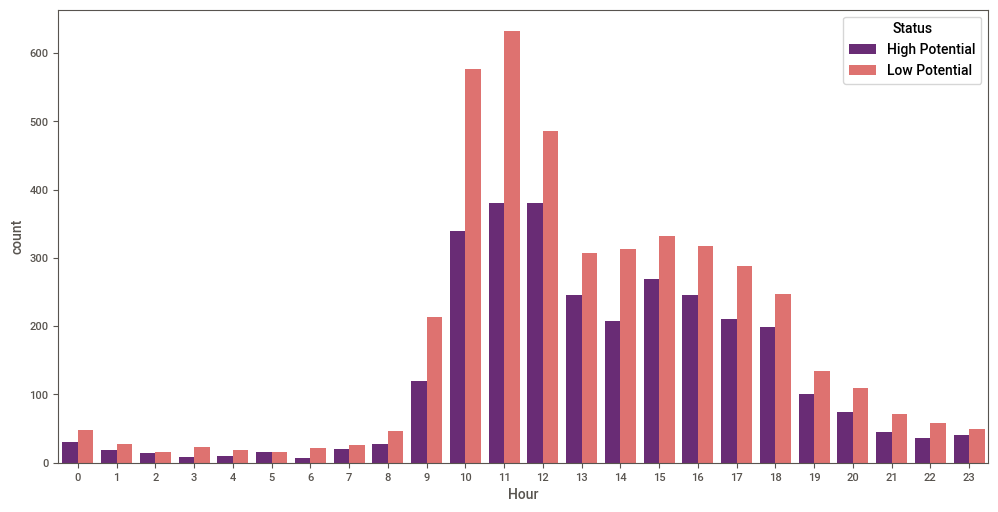

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="Hour", hue="Status", palette="magma")

- The hour doesn't seem to be a storng indicator of lead quality since on all hours low potential clients are higher.
- In general orders placed during the evening/night (3:00p.m-12:00a.m) and early morning (7:00- 8:00a.m) hours have proportionally more number of customers with high lead quality. 

# Data Preprocessing

## Missing Values

In [14]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
Weekday           0
Month             0
Day               0
Hour              0
dtype: int64

There are 4 features with missing values.

In [15]:
data.loc[data.Product_ID.isnull()]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Weekday,Month,Day,Hour
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,High Potential,2,11,14,10
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,9
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,9
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,8
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,7
5,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,7
6,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,5
7,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,5
8,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,5
9,NaN,Website,Sales-Agent-10,NaN,Mode-5,High Potential,2,11,14,5


In [16]:
data.loc[data.Source.isnull()]

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Weekday,Month,Day,Hour
13,NaN,NaN,Sales-Agent-10,NaN,Mode-5,High Potential,1,11,13,23
15,NaN,NaN,Sales-Agent-10,NaN,Mode-5,High Potential,1,11,13,20
21,NaN,NaN,Sales-Agent-10,NaN,Mode-5,High Potential,1,11,13,18
128,NaN,NaN,Sales-Agent-10,NaN,Mode-5,High Potential,3,10,11,20
138,NaN,NaN,Sales-Agent-10,NaN,Mode-5,High Potential,3,10,11,18
2518,18.0,NaN,Sales-Agent-5,Other Locations,Mode-3,Low Potential,3,8,30,20
2556,NaN,NaN,Sales-Agent-1,NaN,Mode-5,High Potential,2,8,29,19
2686,9.0,NaN,Sales-Agent-5,Mumbai,Mode-3,High Potential,6,8,26,11
2712,15.0,NaN,Sales-Agent-5,Mumbai,Mode-5,Low Potential,5,8,25,10
2767,15.0,NaN,Sales-Agent-11,Hyderabad,Mode-5,Low Potential,3,8,23,14


As we can see from the above missing value subsets of the dataframe, most rows contain multiple NaN values. Thus it would be better to drop these NaN values rather than imputing them. Also there are only 156 missing values which makes up only about 0.02% of total observations. Moreover since some rows contain multiple columns with NaN values, the actual number of rows dropped is reduced to 94.

In [17]:
data.dropna(inplace=True)
data.isnull().sum()


Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Weekday          0
Month            0
Day              0
Hour             0
dtype: int64

## Categorical Encoding

One of the main challenges of this dataset is that it contains multiple high cardinality categorical features which need to be encoded. Using a combination of various types of encoding for different columns like target encoding, one hot encoding, manual encoding etc. would be the best approach since it would help reduce the number of new dimensions created and thus avoid the curse of dimensionality.

#### Manual Encoding 'Status' (target variable)
Since our target variable is binary in nature, we will manually encode it by assinging 0 to Low Potential and 1 to High Potential. 

In [18]:
data.Status= data.Status.map({'Low Potential':0,'High Potential':1})


#### Target encoding 'Source' and 'Location' 
These two features have comparitively higher cardinality and thus one hot encoding would result in generation of too many new dimensions. To avoid the curse of dimensionality, we will use target encoding for these features.

In [19]:
import category_encoders as ce
encoder = ce.TargetEncoder()
data.Source = encoder.fit_transform(data.Source, data.Status)
data.Location = encoder.fit_transform(data.Location, data.Status)

#### One Hot Encoding 'Sales_Agent', "Product_ID" and 'Delivery_Mode'

In [22]:
data.Product_ID = data.Product_ID.astype('object')
data = pd.get_dummies(data=data, drop_first=True)

In [23]:
data

,Source,Location,Status,Weekday,Month,Day,Hour,Sales_Agent_Sales-Agent-11,Sales_Agent_Sales-Agent-12,Sales_Agent_Sales-Agent-2,...,Product_ID_19.0,Product_ID_20.0,Product_ID_21.0,Product_ID_22.0,Product_ID_23.0,Product_ID_24.0,Product_ID_25.0,Product_ID_26.0,Product_ID_27.0,Product_ID_28.0
18,0.412639,0.505532,1,1,11,13,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0.365536,0.265216,1,1,11,13,18,0,0,0,...,1,0,0,0,0,0,0,0,0,0
24,0.405545,0.465517,1,1,11,13,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0.405545,0.428843,0,1,11,13,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0.365536,0.505532,1,1,11,13,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,0.365536,0.423559,0,5,4,28,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7418,0.365536,0.265216,0,5,4,28,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7419,0.423645,0.505532,0,5,4,28,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7420,0.363636,0.265216,1,5,4,28,8,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Handling Outliers
Since all of our features are categorical in nature, we dont have to handle any outliers. 

# Model Creation

## Splitting the Dataset

In [24]:
from sklearn.model_selection import train_test_split

X= data.drop("Status", axis=1)
y = data.Status

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## Model


In [47]:
# Building the ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

# First Hidden Layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding fully connected layer with a sigmoid activation function
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [48]:
#Compiling the Model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
#Fitting the Model
ann.fit(X_train, y_train, batch_size =25, epochs =25)

Epoch 1/25
220/220 [==============================] - 1s 2ms/step - loss: 0.6840 - accuracy: 0.5933
Epoch 2/25
220/220 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6430
Epoch 3/25
220/220 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6639
Epoch 4/25
220/220 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6676
Epoch 5/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6636
Epoch 6/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6732
Epoch 7/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6665
Epoch 8/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6743
Epoch 9/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.6730
Epoch 10/25
220/220 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.6798

Since the outputs from the ANN model is in terms of probabilities, I have converted them to 0 and 1 as required for evaluation. Probability values less than 0.5 have been assigned the 0 class while probabilities greater than or equal to 0.5 have been assigned 1 class.

In [50]:
y_pred = ann.predict(X_test)
for i in range(0,len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
y_pred

58/58 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## Model Evaluation

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[605, 457],
       [172, 598]], dtype=int64)

In [52]:
from sklearn.metrics import recall_score, precision_score, f1_score
print(f"The model's Recall score is {round(recall_score(y_test, y_pred),2)}.\nhe model's Precision score is {round(precision_score(y_test, y_pred),2)}\nThe model's f1 score is {round(f1_score(y_test, y_pred),2)}")

The model's Recall score is 0.78.
he model's Precision score is 0.57
The model's f1 score is 0.66


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66      1062
           1       0.57      0.78      0.66       770

    accuracy                           0.66      1832
   macro avg       0.67      0.67      0.66      1832
weighted avg       0.69      0.66      0.66      1832



In this use case, it is important that our recall is high. The number of false negatives i.e., a customer actually being high potential but model predicting low potential must be low. We could be linient on the False Positives i.e customer being low potential but model predicting customer to be high potential i.e. lower Precison score for higher Recall. This is because it would be more costly to the business to lose out on a high potential customer than following up with a low potential customer.

From the classification report we can see that although the accuracy and precision is poor the recall score is good for the positive class which is our primary evaluation metric. 

## Cross Validation

In order to perform cross validation using the cross_val_score function of the scikit learn library, we have to create a function that builds the model and then wrap this keras object so that it can be used by sklearn package. 

In [54]:
# Creating a function that returns a compiled network
def create_network():
    # Building the ANN
        ann = tf.keras.models.Sequential()
        ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
        ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
        ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

        # Compiling neural network
        ann.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='adam', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Returning compiled network
        return ann

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
# Wrapping Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=25, 
                                 batch_size=25, 
                                 verbose=0)

In [56]:
from sklearn.model_selection import cross_val_score

ANN_crossval_score = cross_val_score(neural_network,X,y,cv=10, scoring="accuracy", error_score="raise")
print(ANN_crossval_score)
print("Cross validation Score:",ANN_crossval_score.mean())
print("Std :",ANN_crossval_score.std())
#std of < 0.05 is good. 

23/23 [==============================] - 0s 1ms/step
[0.64392906 0.64120055 0.64120055 0.64529332 0.66439291 0.61664393
 0.66712142 0.63983629 0.71857923 0.7363388 ]
Cross validation Score: 0.6614536040972425
Std : 0.03574317587950233


10 fold cross validation scores reveal that the model has an average accuracy of 0.66 with a standard deviation of 0.03.

## Conclusion

Our ANN has an avergae model performnce but comapritively better recall scores than other models. One of the main reasons for this performnce could be lack of much useful information in the dataset. The mobile and email columns had to be dropped which further reduced the available data in the first place. I feel more information/features such as the customers business type etc., would have helped the model performance. 

## Kindly review the report for detailed analysis